## Model Domain and Bathymetry

In [1]:
from salishsea_tools      import nc_tools, viz_tools
from matplotlib           import pyplot, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np

%matplotlib inline
rcParams.update({'font.size': 12})
rcParams["axes.formatter.useoffset"] = False

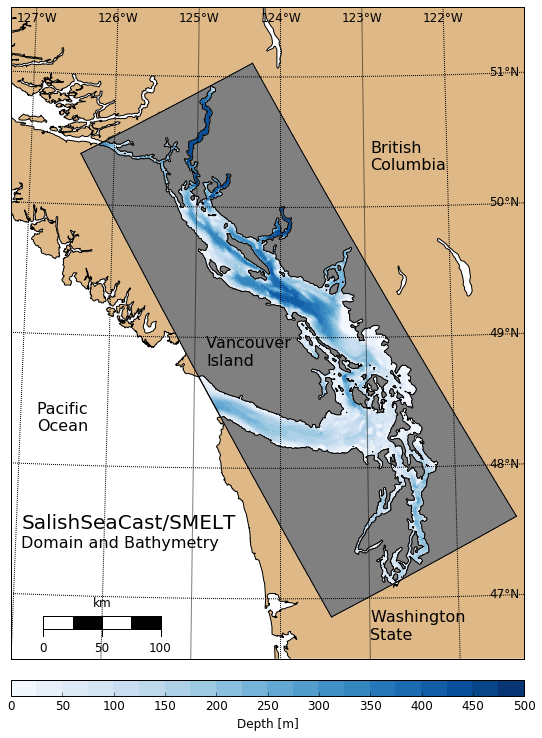

In [20]:
# Load results
timerange = ['2016 Aug 1 00:00', '2016 Aug 2 00:00']
NEMO = nc_tools.load_NEMO_from_erddap(timerange)

# Make figure window
fig, ax = pyplot.subplots(1, 1, figsize=(10, 12.5))

# Define map window
w_map = [-127, -121, 46.5, 51.5]
lon_0 = (w_map[1] - w_map[0]) / 2 + w_map[0]
lat_0 = (w_map[3] - w_map[2]) / 2 + w_map[2]

# Make projection
m = Basemap(projection='lcc', resolution='h',
            lon_0=lon_0, lat_0=lat_0,
            llcrnrlon=w_map[0], urcrnrlon=w_map[1],
            llcrnrlat=w_map[2], urcrnrlat=w_map[3])

# Add features and labels
m.drawcoastlines(zorder=1)
m.fillcontinents(color='Burlywood', zorder=0)
m.drawmeridians(np.arange(-127, -120), labels=[0, 0, 1, 0], yoffset=-15000, zorder=5)
m.drawparallels(np.arange(47, 52), labels=[0, 1, 0, 0], xoffset=-30000, zorder=5)

x, y = m(NEMO.longitude.values, NEMO.latitude.values)

m.contour( x, y, NEMO.bathymetry, [0], colors='Black', zorder=4)
m.contourf(x, y, NEMO.bathymetry, [-0.01, 0.01], colors='Gray', zorder=3)
m.contourf(x, y, NEMO.bathymetry, range(0, 525, 25), cmap='Blues', zorder=2)
cbar = m.colorbar(label='Depth [m]', location='bottom')
cbar.ax.set_aspect(.03)
cbar.set_ticks(range(0, 550, 50))

m.plot(x[ :,  0], y[ :,  0], 'k-', zorder=6)
m.plot(x[ :, -1], y[ :, -1], 'k-', zorder=6)
m.plot(x[ 0,  :], y[ 0,  :], 'k-', zorder=6)
m.plot(x[-1,  :], y[-1,  :], 'k-', zorder=6)

m.drawmapscale(-126, 46.8, lon_0, lat_0, 100, barstyle='fancy', fontsize=12)

ax.text(0.02, 0.2, 'SalishSeaCast/SMELT', transform=ax.transAxes, fontsize=20)
ax.text(0.02, 0.17, 'Domain and Bathymetry', transform=ax.transAxes, fontsize=16)
ax.text(0.05, 0.35, 'Pacific\nOcean', transform=ax.transAxes, fontsize=16)
ax.text(0.7, 0.75, 'British\nColumbia', transform=ax.transAxes, fontsize=16)
ax.text(0.38, 0.45, 'Vancouver\nIsland', transform=ax.transAxes, fontsize=16)
ax.text(0.7, 0.03, 'Washington\nState', transform=ax.transAxes, fontsize=16)

pyplot.show()

fig.savefig('/home/bmoorema/Desktop/domain.png', transparent=True, bbox_inches='tight')